# Logistic Regression

This notebook goes over the problems posed for logistic regression in the accompanying worksheet.

## Q1
---
Bernoulli random variable is given by the probability distribution:

$$
\mathbb{P}(Y_i = y_i) = \pi_i^{y_i} (1 - \pi_i)^{1-y_i}, \quad for \quad y_i = 0,1
$$

What is the expectation $\mathbb{E}(Y_i)$ and variance $Var(Y_i)$ of the Bernoulli random variable?

## A1
---

$\mathbb{E}(Y_i) = \sum \limits_{y_i = 0,1} P(Y_i = y_i) y_i = 1\times \pi_i + 0\times(1-\pi_i) = \pi_i$

$Var(Y_i) = \mathbb{E}(Y_i^2)-\mathbb{E}(Y_i)^2 = 1\times \pi_i - (\pi_i)^2 = \pi_i(1-\pi_i) $

---
## Q2
---
Binomial random variable is given by the probability distribution:

$$
\begin{equation}
  \mathbb{P}(Y_i = y_i) = \left(
  \begin{array}{rcr}
    n_i \\
    y_i
  \end{array}
  \right) \pi_i^{y_i} (1 - \pi_i)^{n_i - y_i}
\end{equation}
$$

What is the expectation $\mathbb{E}(Y_i)$ and variance $Var(Y_i)$ of the Binomial random variable?

## A2
---

We use indicator variables and linearity of expecation values here. 

Let $I_{ij}$ = 1 if observation j is a success within group i, and 0 otherwise. The indicator variables follow a Bernoulli distribution with parameter $\pi_i$.

Then:

$Y_i = \sum \limits_{j=1}^{n_i} I_{ij}$

Thus we can write:

$
\begin{align}
\mathbb{E}(Y_i) &= \mathbb{E}\left(\sum \limits_{j=1}^{n_i} I_{ij}\right) \\
&= \sum \limits_{j=1}^{n_i} \mathbb{E}(I_{ij}) \\
&= \sum \limits_{j=1}^{n_i} \pi_i \\
&= n_i \pi_i
\end{align}
$

We can do the same thing for the variance, but let's work out the first squared term separately. In the following we make use of:

* $ \mathbb{E}(I_{ij} I_{ik}) = \mathbb{E}(I_{ij})\mathbb{E}(I_{ik}) $ (Independent observations)

* $ \sum \limits_{i=1}^{n} A_i^2 $ Has $n^2$ total terms, n of which are diagonal $(A_i^2)$, and $n^2-n$ of which are off diagonal: $A_i A_j$

$
\begin{align}
\mathbb{E}(Y_i^2) &= \mathbb{E}\left[\left(\sum \limits_{j=1}^{n_i} I_{ij}\right)^2\right] \\
&= \mathbb{E}\left[\sum \limits_{j=1}^{n_i} \sum \limits_{k=1}^{n_i} I_{ij} I_{ik}\right] \\
&= \mathbb{E}\left[\sum \limits_{j=1}^{n_i} I_{ij}^2 + \sum \limits_{j=1}^{n_i} \sum \limits_{k\neq j} I_{ij} I_{ik}\right]\\
&= \sum \limits_{j=1}^{n_i} \mathbb{E}(I_{ij}^2) + \sum \limits_{j=1}^{n_i} \sum \limits_{k\neq j} \mathbb{E}(I_{ij}I_{jk})\\
&= \sum \limits_{j=1}^{n_i} \mathbb{E}(I_{ij}^2) + \sum \limits_{j=1}^{n_i} \sum \limits_{k\neq j} \mathbb{E}(I_{ij})\mathbb{E}(I_{jk})\\
&= n_i \pi_i + (n_i^2-n_i) \pi_i^2
\end{align}
$

Thus the variance is:

$
\begin{align}
Var(Y_i) = \mathbb{E}(Y_i^2) - \mathbb{E}(Y_i)^2 = n_i \pi_i + (n_i^2-n_i) \pi_i^2 - (n_i \pi_i)^2 = n_i \pi_i (1-\pi_i)
\end{align}
$

---
## Q3
---

Show that the inverse of the $\text{logit}^{-1}(a) = \text{logistic}(a) = \frac{1}{1 + e^{-a}}$.

---
## A3

We start with the defintion and go from there:

$
\begin{aligned}
logit(x) = log\left(\frac{x}{1-x}\right) &= y \\
\frac{x}{1-x} &= e^y\\
x &= e^y - xe^y \\
x(1+e^y) &= e^y\\
x &= \frac{e^y}{1+e^y} \\
x &= \frac{1}{1+e^{-y}}\\
x &= logit^{-1}(y) = logistic(y)
\end{aligned}
$

---
## Q4-7 (Logistic Regression)
---
Define the probability mass function (PMF), the log-likelihood, gradient, and Hessian of the LL for logistic regression.

## A4 - 7
---

We start with the PMF, which is simply given by the binomial distribution: 

$ P(Y_i = y_i) = {n_i \choose y_i} \pi_i^{y_i} (1-\pi_i)^{n_i-y_i} $

For multiple (N) independent observations, this is promoted to:

$ P(\vec{Y} = \vec{y}) = \prod \limits_{i=1}^{N} {n_i \choose y_i} \pi_i^{y_i} (1-\pi_i)^{n_i-y_i}$


We also will need the logistic and logit functions:

$
\begin{aligned}
\eta_i  = x_i^T \beta = logit(\pi_i) = log\left(\frac{\pi_i}{1-\pi_i}\right) \\
\pi_i = logistic(\eta_i) = \frac{1}{1+e^{-\eta_i}}
\end{aligned}
$

To get the log-likelihood function:

$
\begin{aligned}
l(\beta) &= log\left[\prod \limits_{i=1}^{N} {n_i \choose y_i} \pi_i^{y_i} (1-\pi_i)^{n_i-y_i}\right]
\\
&= \sum \limits_{i=1}^{N} log{n_i \choose y_i} + y_i log(\pi_i) + (n_i-y_i) log(1-\pi_i)
\end{aligned}
$

Ignoring the constant term (which is just 1 in the case $n_i = 1$ anyways, we get:

$
\begin{aligned}
l(\beta) 
&= \sum \limits_{i=1}^{N}  y_i log(\pi_i) + (n_i-y_i) log(1-\pi_i)
\\
&= \sum \limits_{i=1}^{N} y_i log \left( \frac{\pi}{1-\pi_i} \right) + n_i log(1-\pi_i)
\\
&= \sum \limits_{i=1}^{N} y_i \eta_i + n_i log\left(1-\frac{1}{1+e^{-\eta_i}}\right)
\\
&= \sum \limits_{i=1}^{N} y_i \eta_i - n_i log\left(1+e^{\eta_i}\right)
\\
&= \sum \limits_{i=1}^{N} y_i x_i^T\beta - n_i log\left(1+e^{x_i^T\beta}\right)
\end{aligned}
$

Next we take the gradient of the LL. First we make note of a few useful derivatives:

$
\begin{aligned}
\frac{\partial \pi_i}{\partial \eta_i} &= \pi_i(1-\pi_i) \\
\frac{\partial \eta_i}{\partial \beta_j} &= \frac{\partial \sum \limits_{k=1}^N x_{ik} \beta_k}{\partial \beta_j} = x_{ij}
\end{aligned}
$

Now applying to the LL:

$
\begin{aligned}
l(\beta) &= \sum \limits_{i=1}^{N}  y_i log(\pi_i) + (n_i-y_i) log(1-\pi_i)
\\
\frac{\partial l}{\partial \beta_j} &= \sum \limits_{i=1}^{N}  y_i \frac{1}{\pi_i}(\pi_i(1-\pi_i))x_{ij} 
+ (n_i-y_i) \frac{1}{1-\pi_i}(-\pi_i(1-\pi_i))x_{ij}
\\
&= \sum \limits_{i=1}^{N} y_i x_{ij} - y_i \pi_i x_{ij} - n_i \pi_i x_{ij} + y_i \pi_i x_{ij}
\\
&= \sum \limits_{i=1}^{N} y_i x_{ij} - n_i \pi_i x_{ij} 
\\
&= \sum \limits_{i=1}^{N} y_i x_{ij} - n_i \frac{1}{1+e^{-x_i^T\beta}} x_{ij} 
\\
&= \sum \limits_{i=1}^{N} y_i x_{ij} - \mu_i x_{ij} 
\end{aligned}
$

In vector form:

$\nabla_\beta l = X^T (\vec{y} - \vec{\pi}) $

Where we have used $n_i \pi_i = \mu_i$ at the end. 

Finally, let's compute the Hessian. This is relatively simple, as only one term in the above still carries any $\beta$ dependence.

$
\begin{aligned}
\frac{\partial l}{\partial \beta_j} &= \sum \limits_{i=1}^{N} y_i x_{ij} - n_i \pi_i x_{ij} 
\\
\frac{\partial^2 l}{\partial \beta_j \beta_k} &= H_{ij} = - \sum \limits_{i=1}^{N}  n_i \pi_i(1-\pi_i) x_{ik} x_{ij} 
\end{aligned}
$

In matrix form:

$ H =- X^T \vec{\pi} .* (1-\vec{\pi}) X $

---
## Q8 
---
Perform Newton-Rhapson to find the maximum likelihood estimates (MLE).

Most of this is just copied over from the worksheet, with the exception of the actual optimization - here it will be implemented with NR. 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#Import Dataset
dataset = pd.read_csv('../Data/social_network_data.csv')
p = 2
N = 200

dataset.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
x = dataset.iloc[:,[2,3]].values
y =dataset.iloc[:,4].values

In [5]:
#Split Training Set and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [6]:
#Feature Scaling
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [89]:
# NEWTON RHAPSON SOLUTION

# Need to add my own intercept
x_trainNR = np.c_[np.ones(len(x_train)), x_train]
x_testNR = np.c_[np.ones(len(x_test)),x_test]

# Make everything 2D so we can do matrix math
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

def sigmoid(X,beta):
    
    return 1/(1+np.exp(-X@beta))

def loglikelihood(X,y,beta):
    
    J= np.sum(y*np.log(sigmoid(X,beta))+(1-y)*np.log(1-sigmoid(X,beta)))
    
    return J

def gradient(X,y,beta):
    
    dbeta = X.T@(y-sigmoid(X,beta))
    
    return dbeta

def hessian(X,y,beta):
    
    pivec = sigmoid(X,beta)*(1-sigmoid(X,beta))
    
    pimat = np.diag(pivec.reshape(-1))
    
    return -X.T@pimat@X


def newtonRhapson(betaInit,X,y,max_iter,gamma):

    beta = betaInit
    # Initialize cost vector and iteration vector for later plotting
    iter_vec = np.array(range(max_iter))
    cost_vec = np.zeros(max_iter)

    for ii in range(max_iter):
        # Calculate the gradient
        dbeta = gradient(X,y,beta)

        # Hessian inverse
        hess = hessian(X,y,beta)
        hinv = np.linalg.inv(hess)

        # Update beta
        beta = beta - gamma * hinv@dbeta

        # Calculate the value of the log-likelihood
        cost = loglikelihood(X,y,beta)

        # Save cost for later plotting
        cost_vec[ii] = cost

    
    # Create this to use later
    outputPlt = plt.plot(iter_vec,cost_vec)

            
    return outputPlt,beta

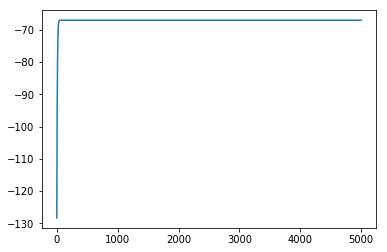

In [110]:
# Initialize beta
betaInit = np.random.uniform(low=-0.1,high=0.1, size=(p+1,1))

# Hyperparameters
max_iter = 5000
gamma = 1e-1

# Perform NR
(outputPlt,beta) = newtonRhapson(betaInit,x_trainNR,y_train,max_iter,gamma)

In [131]:
# Coefficients from NR:
print('Newton-Rhapson Coefficients:\n')
print('intercept:', beta[0])
print('\ncoefficients:', beta[1:].T)

# Coefficients from NR (rescaled?):
print('\nNewton-Rhapson Coefficients, Scaled Back:\n')
print('coefficients:', beta[1:].T/sc_X.mean_)

Newton-Rhapson Coefficients:

intercept: [-1.21895764]

coefficients: [[2.37877157 1.54043509]]

Newton-Rhapson Coefficients, Scaled Back:

coefficients: [[6.27395904e-02 2.16171077e-05]]


In [105]:
#Training the Logistic Model via Black Box
classifier = LogisticRegression(solver='lbfgs')
classifier.fit(x_train, y_train.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [109]:
# Black Box coefficients
print('Newton-Rhapson Coefficients:\n')
print('intercept:', classifier.intercept_)
print('\ncoefficients:', classifier.coef_)

Newton-Rhapson Coefficients:

intercept: [-1.12355165]

coefficients: [[2.04497211 1.33187735]]


---
## Q9
---

What is the impact on the odds of a purchase with a dollar increase in EstimatedSalary?

## A9
---

A dollar increase in EstimatedSalary corresponds to an increase in the odds of $e^{\beta_{ES}} \sim 1$%

(Where I think that I've changed back to the right scale to answer that)

---
## Q10
---

What is the odds of purchase with an age of 38 and estimated salary of \$60,000?

In [144]:
x_new = np.array([[38.0,60000.0]])
x_newScaled = sc_X.transform(x_new)

x_newNR = np.c_[[1.0], x_newScaled]

eta_new = x_newNR@beta

odds = np.exp(eta_new)

print('The odds are: ',odds[0][0])

The odds are:  0.17361189045402123
